In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Tools for scaling data, PCA, and standard datasets
from sklearn import preprocessing, decomposition, datasets

# Tools for tracking learning curves and perform cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve, learning_curve

# The k-NN learning algorithm
from sklearn.neighbors import KNeighborsClassifier as kNN

from sklearn.datasets import load_breast_cancer

# One-hot enconding and ordinal encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Apply transformations to columns
from sklearn.compose import make_column_transformer

In [10]:
#!git clone https://github.com/Abudo-S/GenericML.git
#you need to import the github repo into folders, then navigate to the dataset and copy its path
pima = pd.read_csv("/content/GenericML/MSA-main/Datasets/diabetes.csv")
pima.info()

Cloning into 'GenericML'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 22 (delta 3), reused 22 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 3.73 MiB | 4.49 MiB/s, done.
Resolving deltas: 100% (3/3), done.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome  

In [11]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The `Outcome` column contains the labels. We use this to construct our sets of training points and training labels.

In [30]:
X = pima.drop(columns='Outcome').values
y = pima['Outcome'].values
print(f'instances:{X}\n labels:{y}')

instances:[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
 labels:[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0

As before, we count the proportions of positive and negative labels.

In [21]:
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 268]))

Then we split the dataset in training set (60%) and test set (40%) using stratification.

In [24]:
#stratification is a balancing technique to make sure that the proportions of different classes in your original dataset are maintained in both your training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
print(f'labels of training set {np.unique(y_train, return_counts=True)}')
print(f'labels of test set {np.unique(y_test, return_counts=True)}')

labels of training set (array([0, 1]), array([299, 161]))
labels of test set (array([0, 1]), array([201, 107]))


We plot the cross-validated estimates of the risk for different values of $k$.

In [35]:
neighbors = range(1,200,20)
train_score, val_score = validation_curve(kNN(), X, y, param_name='n_neighbors', param_range=neighbors, cv=5)
print(f'neighbors: {[*neighbors]}\n train_score: {train_score}\n val_score: {val_score}')

neighbors: [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]
 train_score: [[1.         1.         1.         1.         1.        ]
 [0.78013029 0.79967427 0.77361564 0.77398374 0.76910569]
 [0.74918567 0.75081433 0.747557   0.73170732 0.74634146]
 [0.75570033 0.75732899 0.74592834 0.7398374  0.7300813 ]
 [0.74918567 0.75732899 0.73127036 0.72520325 0.72845528]
 [0.74267101 0.74592834 0.72149837 0.71219512 0.72682927]
 [0.73778502 0.73778502 0.70846906 0.71056911 0.71382114]
 [0.72801303 0.73289902 0.68566775 0.70406504 0.68943089]
 [0.69055375 0.69543974 0.65635179 0.70081301 0.66829268]
 [0.65798046 0.6514658  0.6514658  0.67154472 0.65853659]]
 val_score: [[0.64285714 0.62987013 0.66883117 0.75816993 0.61437908]
 [0.75324675 0.67532468 0.73376623 0.81045752 0.74509804]
 [0.73376623 0.7012987  0.74025974 0.75163399 0.75163399]
 [0.75324675 0.7012987  0.76623377 0.73202614 0.73856209]
 [0.73376623 0.69480519 0.75974026 0.73856209 0.69281046]
 [0.70779221 0.69480519 0.74025974 0.7124183  0

Once more, the regions of underfitting and overfitting for the parameter $k$ are clearly seen in the plot.

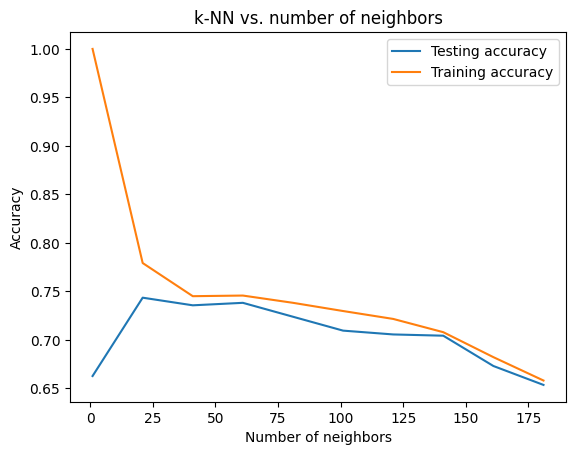

In [32]:
plt.title('k-NN vs. number of neighbors')
plt.plot(neighbors, np.mean(val_score, 1), label='Testing accuracy')
plt.plot(neighbors, np.mean(train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Cross-validation to evaluate performance of a given algorithm
The function `cross_val_score()` performs cross validation to estimate the risk of the classifier output by a given algorithm.

Here is an example using $5$-fold cross-validation on the entire dataset to evaluate the performance of $21$-NN.

In [38]:
knn = kNN(n_neighbors=21)
scores = cross_val_score(knn, X, y, cv=20)
print(f'scores: {scores}\n overall score mean: {scores.mean()}') #scores mean is used to determines the overall score for such parameter (ex.n_neighbors)

scores: [0.61538462 0.79487179 0.74358974 0.74358974 0.66666667 0.69230769
 0.69230769 0.56410256 0.63157895 0.84210526 0.81578947 0.78947368
 0.68421053 0.89473684 0.73684211 0.97368421 0.76315789 0.73684211
 0.73684211 0.86842105]
 overall score mean: 0.7493252361673414


### Grid-search to find best value of parameter for the learning algorithm
We can use the function `GridSearch()` to look for the best parameter of an algorithm using the entire dataset.
- Repeat 5-fold cross-validation on the entire dataset for each value of the parameter in the grid
- Select the parameter with the best cross-validated score

In [44]:
k_grid = {'n_neighbors': range(1, 100, 20)}
learner = GridSearchCV(estimator=kNN(), param_grid=k_grid, cv=20, return_train_score=True)
learner.fit(X, y)
learner.best_params_, learner.best_score_ # vars containing the best parameter value and its corresponding cv score

({'n_neighbors': 21}, np.float64(0.7493252361673414))

The algorithm with the best parameter, $21$-NN, is available in the variable `learner.best_estimator_`, that is `learner.best_estimator_ = kNN(n_neighbors=21)`

We repeat the evaluation of this algorithm using 5-fold cross-validation.

In [45]:
model = learner.best_estimator_
scores = cross_val_score(model, X, y, cv=20)
print(f'scores: {scores}\n overall score mean: {scores.mean()}') #scores mean is used to determines the overall score for such parameter (ex.n_neighbors)


scores: [0.61538462 0.79487179 0.74358974 0.74358974 0.66666667 0.69230769
 0.69230769 0.56410256 0.63157895 0.84210526 0.81578947 0.78947368
 0.68421053 0.89473684 0.73684211 0.97368421 0.76315789 0.73684211
 0.73684211 0.86842105]
 overall score mean: 0.7493252361673414


### Nested cross-validation to evaluate performance of a learning algorithm with parameters to tune
We saw that cross-validation allows us to use the data for choosing a good value of the parameter. However, we are still left with the problem of estimating the risk of the classifier generated by the algorithm. Nested cross-validation provides a way of estimating the risk of a classifier generated by an algorithm whose parameters are tuned using cross-validation on the training set.

In the following example, we:
- Run 5-fold cross-validation on the entire dataset
- On the training part of each fold, run *internal* 5-fold cross-validation to find the best value of the parameter
- Re-train the model on the training part of the outer fold using the optimized parameter
- Test the model on the testing part of the outer fold.

In [46]:
k_grid = {'n_neighbors': range(1,100,20)}
learner = GridSearchCV(estimator=kNN(), param_grid=k_grid, cv=20) # internal C-V
scores = cross_val_score(learner, X, y, cv=20) # external C-V
print(f'scores: {scores}\n overall score mean: {scores.mean()}') #scores mean is used to determines the overall score for such parameter (ex.n_neighbors)

scores: [0.61538462 0.79487179 0.74358974 0.74358974 0.66666667 0.69230769
 0.69230769 0.56410256 0.63157895 0.84210526 0.81578947 0.78947368
 0.63157895 0.89473684 0.73684211 0.97368421 0.76315789 0.73684211
 0.76315789 0.86842105]
 overall score mean: 0.7480094466936572


Note that the nested cross-validated estimate is $0.72$, while the cross-validated estimate we computed above using grid search on the entire dataset is higher, $0.74$. This discrepancy occurs because the nested CV estimate is statistically more accurate than the cross-validated estimate, which tends to overfit a bit.

## Preprocessing the dataset
Many learning algorithms may work better when the training set is rescaled in certain ways. Note that, in order to avoid contributing to overfitting, these rescalings should not depend on the training examples.

We illustrate the most popular rescaling technique on the cancer dataset.

In [47]:
data = load_breast_cancer()
X = data.data
y = data.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)

The `StandardScaler()` function standardizes the values of each feature $i$. If $x_1(i),\ldots,x_m(i)$ are the values of the $i$-th feature in the dataset $x(1),\dots,x(m)$, then `StandardScaler()` replaces each value $x_t(i)$ with
$$x_t(i)' = \frac{x_t(i)-\mu_i}{\sigma_i}$$
where $$\mu_i = \frac{1}{m}\sum_{t=1}^m x_t(i) \;\;\;\textrm{and}\;\;\; \sigma_i^2 = \frac{1}{m}\sum_{t=1}^m \bigl(x_t(i)-\mu_i\big)^2$$

Note that `standard_scaler.fit_transform()` is used to compute mean $\mu_i$ and standard deviation $\sigma_i$ for each feature $i$ on the training data and then to rescale the training data. The testing data are rescaled using the parameters computed on the training data. Allowing the learner to compute the rescaling parameters using the testing data would imply that the test set is made available (without labels) before the classifier is generated. This is typically not allowed in the statistical learning model.
Many machine learning algorithms are sensitive to these differences in scale. Features with larger values might dominate the learning process, leading to biased models that don't learn effectively from features with smaller ranges.  
StandardScaler transforms each feature to have a mean of 0 and a standard deviation of 1. This brings all features to a comparable scale, ensuring they contribute more equally to the model.

In [52]:
standard_scaler = preprocessing.StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

print(f'scaled X_train_standard instances:{X_train_standard}\n scaled X_test_standard intances:{X_test_standard}')

scaled X_train_standard instances:[[-1.58950236e+00 -1.36077194e+00 -1.55216461e+00 ... -4.26828150e-01
   8.91064488e-02  1.08293468e+00]
 [-1.69678839e-01  3.33087836e-01 -1.30579127e-01 ...  1.65338929e+00
  -1.82438825e-01  1.19839363e+00]
 [-2.94047165e-01  1.77588508e-03 -3.73595955e-01 ... -1.52120470e+00
  -7.50215308e-01 -1.12180627e+00]
 ...
 [-5.36999246e-01 -2.81265450e-01 -5.54074773e-01 ... -3.79953759e-01
   4.51681105e-01 -5.02001685e-01]
 [-8.05981906e-01 -1.29714249e+00 -7.76945128e-01 ... -4.12189145e-01
  -1.27016279e+00 -8.62023655e-01]
 [ 8.62867502e-01 -4.86888492e-02  9.18716330e-01 ...  2.07481520e+00
   2.83508179e-01  3.32976383e-01]]
 scaled X_test_standard intances:[[ 0.212103   -0.36025373  0.18337007 ... -0.45699337  1.04105778
  -0.59909216]
 [ 0.70379173 -0.22202424  0.63330797 ... -0.33648035 -0.8196445
  -1.02733987]
 [-0.75102846 -0.71789511 -0.77610569 ... -0.71724236 -0.11455251
   0.176582  ]
 ...
 [ 1.27935678 -0.39097139  1.25029369 ...  0.77357

Next, we compute the test set performance with and without rescaling for different values of $k$.

In [50]:
neighbors = range(1,8)
test_scores = []
test_scores_standard = []

for k in neighbors:
    knn = kNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))
    knn.fit(X_train_standard, y_train)
    test_scores_standard.append(knn.score(X_test_standard, y_test))

Plotting the perfomance in both cases shows the benefits of rescaling.

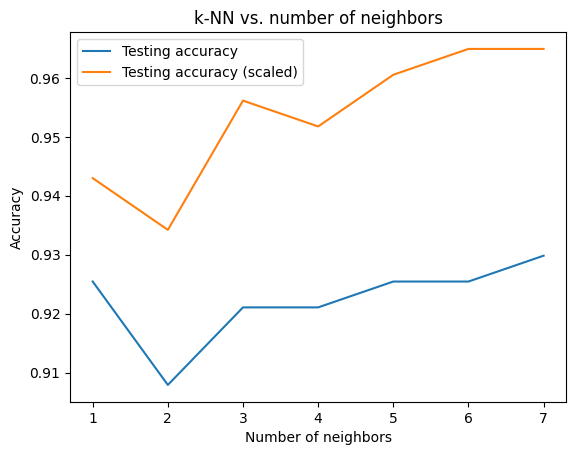

In [51]:
plt.title('k-NN vs. number of neighbors')
plt.plot(neighbors, test_scores, label='Testing accuracy')
plt.plot(neighbors, test_scores_standard, label='Testing accuracy (scaled)')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We now repeat the same exercise use the Pima Indians dataset.

In [53]:
X = pima.drop(columns='Outcome').values
y = pima['Outcome'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
standard_scaler = preprocessing.StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [54]:
neighbors = range(1,100,20)
test_scores = []
test_scores_standard = []

for k in neighbors:
    knn = kNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))
    knn.fit(X_train_standard, y_train)
    test_scores_standard.append(knn.score(X_test_standard, y_test))

Also in this case, we see that rescaling helps boost the test accuracy when $k$ is not chosen optimally.

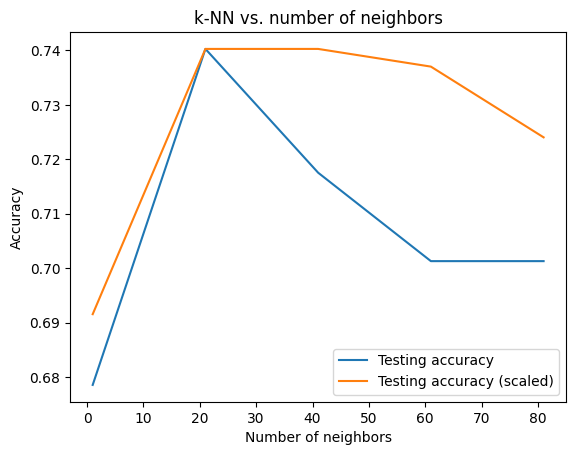

In [55]:
plt.title('k-NN vs. number of neighbors')
plt.plot(neighbors, test_scores, label='Testing accuracy')
plt.plot(neighbors, test_scores_standard, label='Testing accuracy (scaled)')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Feature encoding
Scikit_learn does not work on datasets with categorical features. Here we show how to **transform categorical values into numerical values**.

In [57]:
data = pd.read_csv("/content/GenericML/MSA-main/Datasets/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


This dataset has 5 categorical features. The labels to predict are `math score`, `reading score`, and `writing score`.

In [59]:
score = data[['math score', 'reading score', 'writing score']]
score.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


To have a single label to predict, we replace the three `score` labels with their mean.

In [60]:
# Calculate average of all test results
data["mean score"] = data[['math score','reading score','writing score']].mean(axis = 'rows')

# Drop math score, reading score and writing score
data = data.drop(columns=['math score', 'reading score', 'writing score'])

# Show first 5 rows of new dataframe
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,female,group B,bachelor's degree,standard,none,NaN
1,female,group C,some college,standard,completed,NaN
2,female,group B,master's degree,standard,none,NaN
3,male,group A,associate's degree,free/reduced,none,NaN
4,male,group C,some college,standard,none,NaN


If the values of a categorical features are not ranked, then we use **one-hot enconding**. This corresponds to creating a new dummy binary feature for each value in the range of the categorical feature. For instance, for `gender` which takes values in `{'male', 'female'}` we create two dummy features, say `gender_m` and `gender_f`.

Then, every occurrence of `gender = 'male'` is replaced by `gender_m = 1` and `gender_f = 0`. Vice versa, every occurrence of `gender = 'female'` is replace by `gender_m = 0` and `gender_f = 1`.

Note that one-hot encoding requires a number of dummy variables equal to the cardinality of the range of the categorical feature.

In [61]:
# Instantiate OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)

In [62]:
# Apply OneHotEncoder to the gender column

ohe.fit_transform(data[['gender']])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [63]:
#Check the result

ohe.fit_transform(data[['gender']])[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [64]:
# The first 5 rows of the gender column for comparison

data['gender'].head()

,gender
0,female
1,female
2,female
3,male
4,male


If the values of the categorical features are ranked according to some criterion, then one should use **ordinal encoding** instead of one-hot encoding.

In [65]:
# Unique values in the parental level of education column

data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

The values of `parental level of education` represent degrees of education, which have a natural ranking.

Ordinal encoding maps values to positive integers `1,2,...` starting from the lowest position in the ranking.

In [66]:
# Specify the order for the level of education

education_categories = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

In [67]:
# Instantiate ordinal encoder

oe = OrdinalEncoder(categories = [education_categories])

In [68]:
# Apply ordinal encoder to parental level of education column

oe.fit_transform(data[['parental level of education']])

array([[4.],
       [2.],
       [5.],
       [3.],
       [2.],
       [3.],
       [2.],
       [2.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [2.],
       [5.],
       [0.],
       [1.],
       [0.],
       [5.],
       [3.],
       [1.],
       [2.],
       [2.],
       [0.],
       [4.],
       [5.],
       [2.],
       [4.],
       [1.],
       [5.],
       [2.],
       [2.],
       [5.],
       [2.],
       [2.],
       [3.],
       [3.],
       [0.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],
       [1.],
       [2.],
       [3.],
       [2.],
       [1.],
       [0.],
       [1.],
       [3.],
       [3.],
       [2.],
       [0.],
       [4.],
       [0.],
       [3.],
       [3.],
       [0.],
       [0.],
       [0.],
       [2.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [0.],
       [0.],
       [3.],
       [0.],

Create matrix with datapoints and vector of labels.

In [69]:
X = data.drop(columns='mean score')
y = data['mean score']

We now convert all categorical variable at once using the function `make_column_transformer`. We use the object `ohe` of type one-hot encoder for all columns but `parental level of education` for which we use the object `oe` of type ordinal encoder.

In [70]:
column_transform = make_column_transformer(
    (ohe, ['gender', 'race/ethnicity', 'lunch', 'test preparation course']),
    (oe, ['parental level of education']))

In [71]:
X = column_transform.fit_transform(X)

X.shape

(1000, 12)

Note that the number of features has increased from 5 to 12.

Here is the resulting dataset which now contains only numerical features.

In [72]:
X

array([[1., 0., 0., ..., 0., 1., 4.],
       [1., 0., 0., ..., 1., 0., 2.],
       [1., 0., 0., ..., 0., 1., 5.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 2.],
       [1., 0., 0., ..., 0., 1., 2.]])